# Notebook Imports

In [35]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [43]:
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
bos.columns = boston.feature_names

In [7]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
bos.shape

(506, 13)

In [9]:
# Column wise information
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
# Statistical Description of all the columns
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
# Checking for null values
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [12]:
boston.data.shape

(506, 13)

In [13]:
prices = pd.DataFrame(boston.target, columns=['House Prices'])
prices.head()

,House Prices
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [14]:
bos['Prices'] = prices

## Correlation in the data

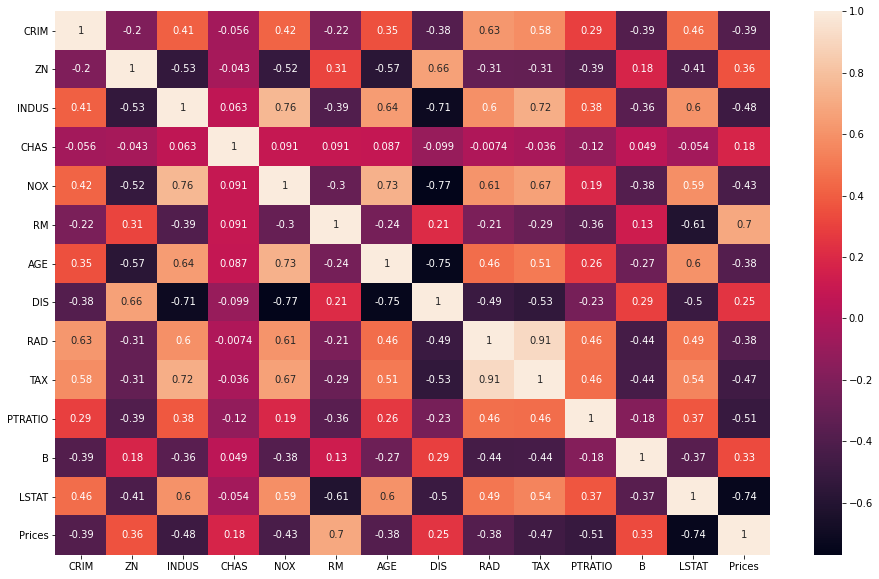

In [15]:
plt.figure(figsize=[16,10])
sns.heatmap(bos.corr(), annot=True)
plt.show()

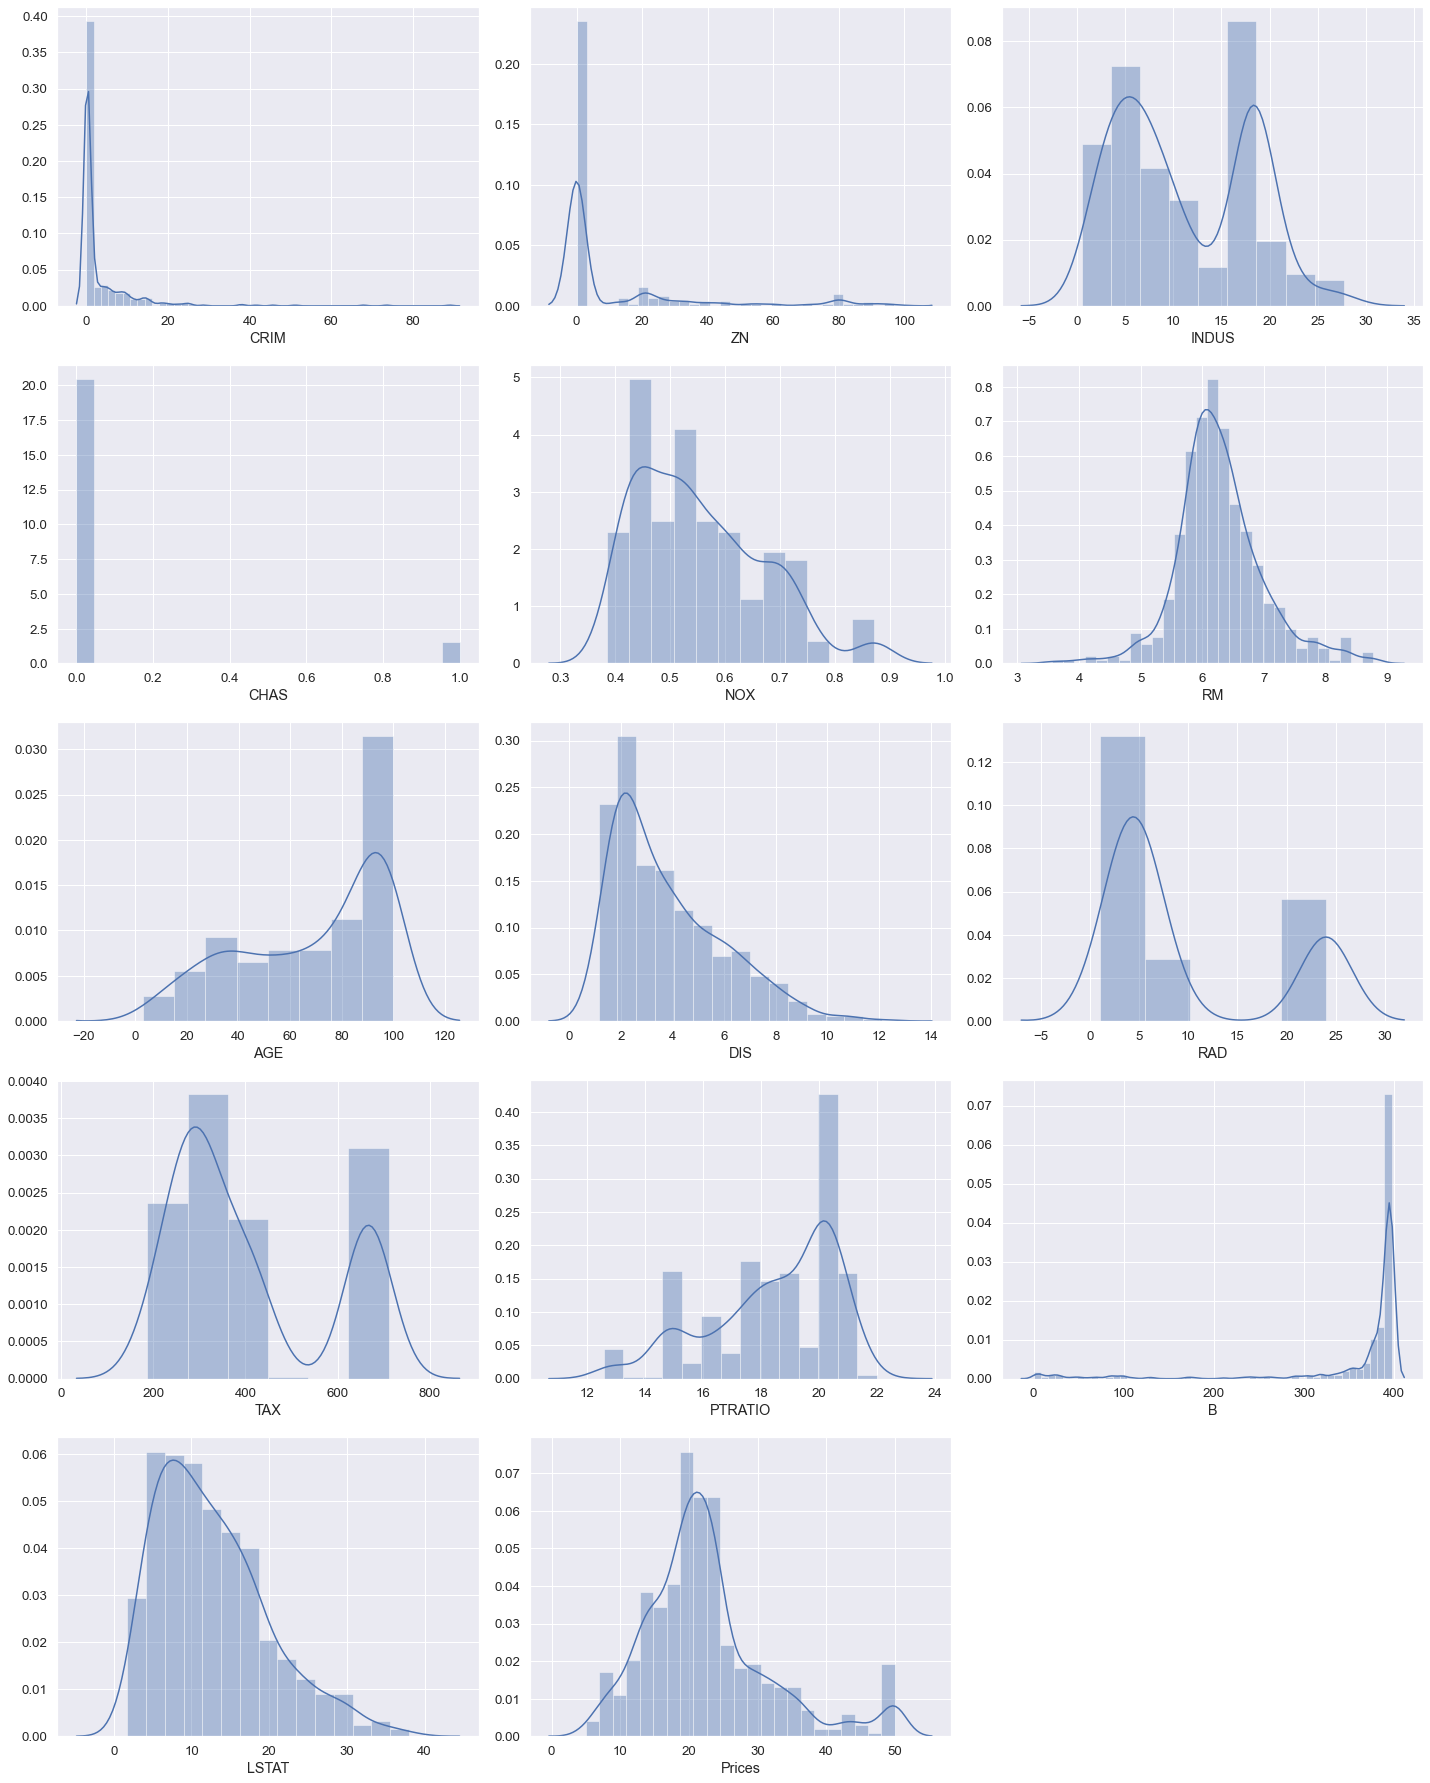

In [44]:
plt.figure(figsize=[20,25])
sns.set(font_scale=1.2)
cnt = 1

for feat in bos.columns:
    if cnt <= 15:
        ax = plt.subplot(5,3,cnt)
        sns.distplot(bos[feat])
    cnt += 1
plt.tight_layout()

In [17]:
# sns.pairplot(bos)
# plt.show()

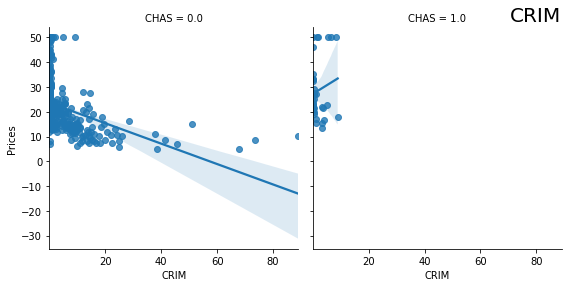

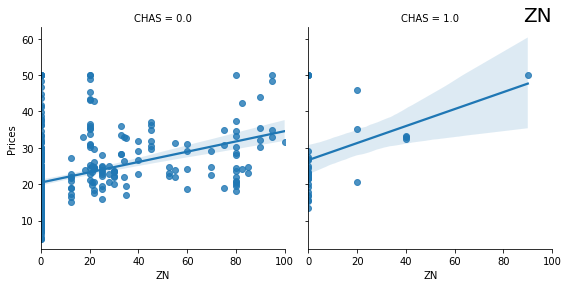

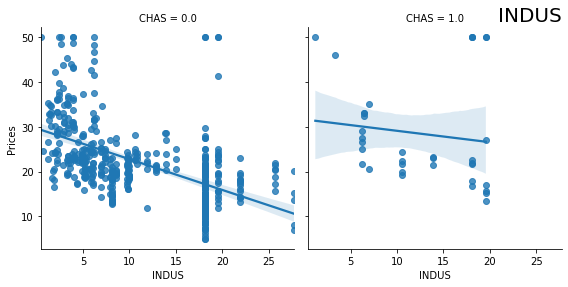

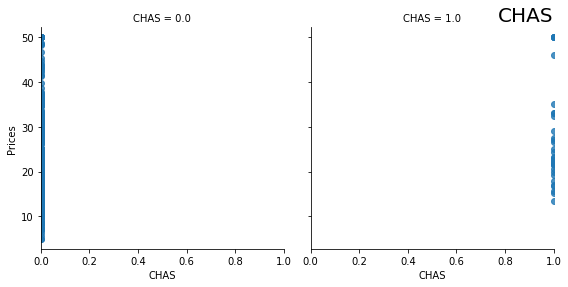

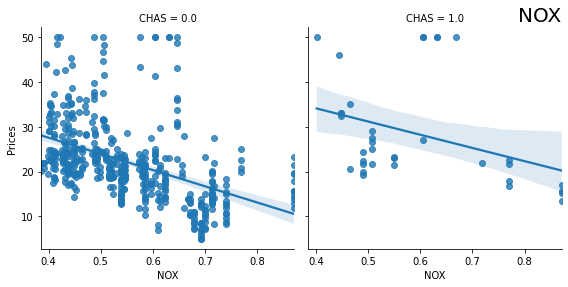

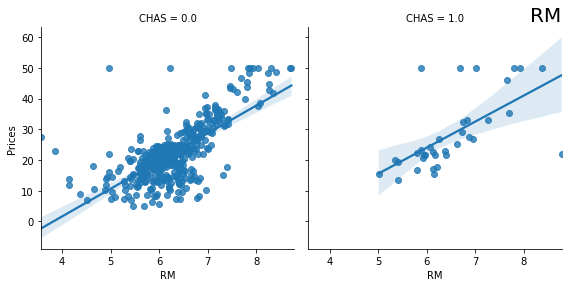

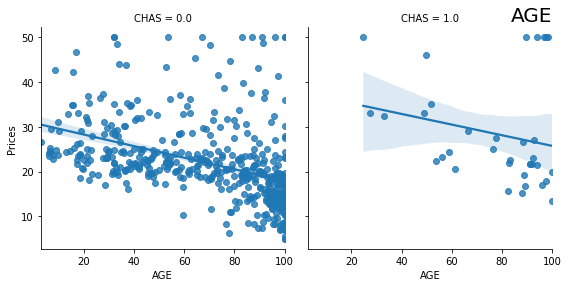

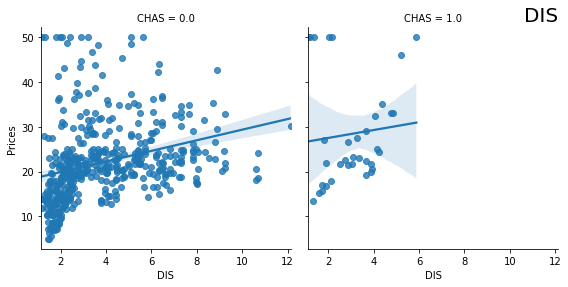

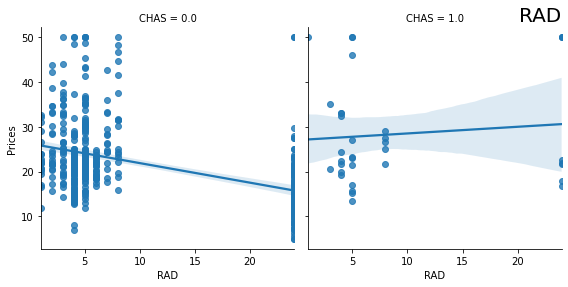

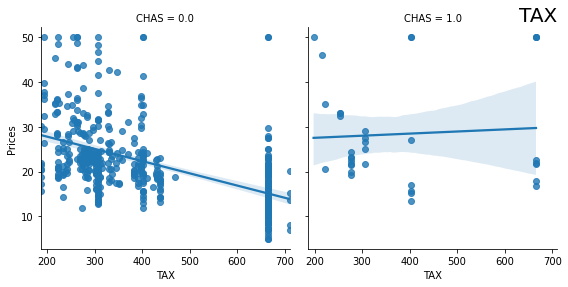

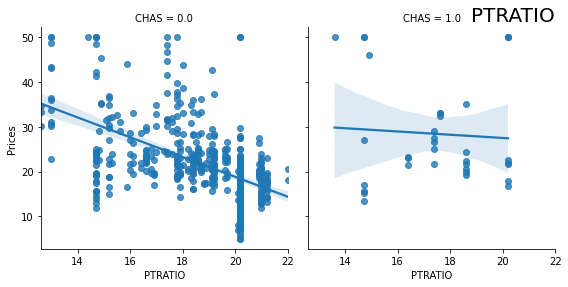

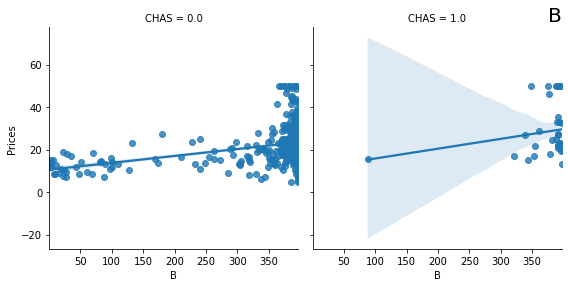

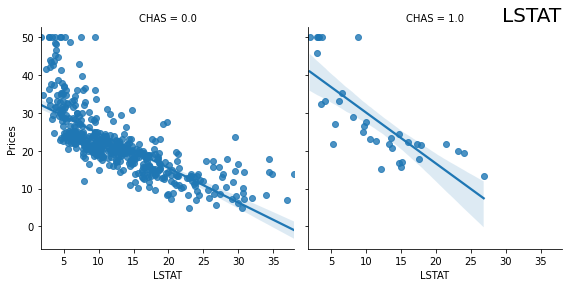

In [18]:
for feat in bos.columns[:-1]:
    sns.lmplot(feat, 'Prices', data=bos, col='CHAS', col_wrap=2, height=4)
    plt.title(feat, loc='right', fontsize=20)
    plt.show()
    print('='*100)

In [19]:
#

In [20]:
#

In [21]:
#

# Linear Regression - 1
### Without Feature Engineering

In [22]:
X = bos.drop(['Prices'], axis=1)
y = prices

In [23]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [25]:
lm_1 = LinearRegression()
lm_1.fit(X_train, y_train)

LinearRegression()

In [26]:
lm_1.intercept_

array([34.08963391])

In [27]:
lm_1.coef_

array([[-9.86523958e-02,  4.67429816e-02,  3.03589576e-02,
         3.01614165e+00, -1.81186387e+01,  3.73325846e+00,
         1.46988182e-02, -1.37756896e+00,  3.24385909e-01,
        -1.35548339e-02, -8.20105607e-01,  9.09573893e-03,
        -5.61054872e-01]])

In [28]:
cross_val_score(lm_1, X_train, y_train, cv=5)

array([0.70392942, 0.57553959, 0.78478802, 0.74777365, 0.6625577 ])

In [29]:
# Predict
y_pred = lm_1.predict(X_test)

In [30]:
# MSE
mse = np.sum(np.square(np.subtract(y_pred, y_test))) / len(y_pred)
print('Mean Squared Error of the model =', float(mse))

Mean Squared Error of the model = 20.558051634229788


In [31]:
print('R-squares score of model for test set =', lm_1.score(X_test, y_test))

R-squares score of model for test set = 0.7484031678924552


In [36]:
# Calculating Adjusted R-squared
r2 = lm_1.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1-r2)*(n-1) / (n-p-1)
print(adj_r2)

0.7112354540583861


In [33]:
#

In [37]:
#

# Scaling Features

In [45]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [46]:
# test train split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=12)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 13)
(127, 13)
(379, 1)
(127, 1)


In [48]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [49]:
regr.intercept_

array([22.56407727])

In [50]:
regr.coef_

array([[-0.85484109,  1.23116632,  0.30084685,  0.81845352, -2.23100711,
         2.35621805,  0.64521463, -2.79062291,  2.84163457, -2.2494211 ,
        -1.73316068,  0.81380691, -4.17925267]])

In [51]:
# Prediction
y_pred = regr.predict(X_test)

In [52]:
print('R-square =', regr.score(X_test, y_test))

R-square = 0.7487680397195025


In [53]:
# Calculating Adjusted R-squared
r2 = regr.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1-r2)*(n-1) / (n-p-1)
print('Adjusted R-squared =', adj_r2)

Adjusted R-squared = 0.7198652478288258


In [ ]:
#

In [ ]:
#

- As the correlation heatmap shows very evident correlation between the features.
- Therefore We will try Lasso (L1 Regularization)

# Lasso

In [54]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [55]:
alpha = lasscv.alpha_
alpha

0.0003506246802894986

In [56]:
# Training L1 Lasso for regression
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0003506246802894986)

In [58]:
print('Lasso R-squared =', lasso_reg.score(X_test, y_test))

Lasso R-squared = 0.7487982182627917


In [59]:
# Calculating Adjusted R-squared
r2 = lasso_reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1-r2)*(n-1) / (n-p-1)
print('Adjusted R-squared =', adj_r2)

Adjusted R-squared = 0.719898898239927


In [60]:
#

- No improvement with Lasso
- Trying Ridge - L3 Regularization
- Double check for overfitting

# Ridge

In [61]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([6.41967191, 4.69166172, 3.68834819, 4.11737476, 5.79627386,
       9.77764674, 8.02328031, 9.66424047, 1.21127386, 7.20322926,
       3.98890207, 6.30295415, 1.89222009, 4.79931425, 2.10370498,
       3.27695782, 9.34377582, 8.76867745, 7.70483087, 6.61629648,
       9.10404258, 6.14525061, 1.8803357 , 7.99201826, 9.88861599,
       5.15889598, 3.2928308 , 3.33005031, 3.73725141, 3.74856311,
       7.62529976, 6.97853123, 6.8477118 , 0.82318897, 4.46726507,
       3.51353898, 3.03194773, 6.81169127, 0.48598095, 8.96126544,
       3.62479051, 1.6060652 , 5.06950804, 1.67246926, 7.93576581,
       8.68159242, 8.09640249, 4.40151509, 0.70432895, 5.46382413]),
        cv=10, normalize=True)

In [62]:
ridgecv.alpha_

0.4859809455079678

In [63]:
ridge_reg = Ridge(ridgecv.alpha_)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.4859809455079678)

In [64]:
print('Ridge R-squared =', ridge_reg.score(X_test, y_test))

Ridge R-squared = 0.748926315626534


In [65]:
# Calculating Adjusted R-squared
r2 = ridge_reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1-r2)*(n-1) / (n-p-1)
print('Adjusted R-squared =', adj_r2)

Adjusted R-squared = 0.7200417324685247


In [66]:
#

- No Improvement in R2
- Negligible improvement in Adjusted R2
- Next - L3 Regularization (Elastic Net)

# Elastic Net

In [67]:
elnetcv = ElasticNetCV(alphas=None, cv=10)
elnetcv.fit(X_train, y_train)

ElasticNetCV(cv=10)

In [68]:
elnetcv.alpha_

0.014029820131925753

In [73]:
elnetcv.l1_ratio_

0.5

In [74]:
elnet_reg = ElasticNet(alpha=elnetcv.alpha_, l1_ratio=elnetcv.l1_ratio_)
elnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.014029820131925753)

In [75]:
print('Elastic Net R-squared =', elnet_reg.score(X_test, y_test))

Elastic Net R-squared = 0.7498909963673022


In [76]:
# Calculating Adjusted R-squared
r2 = elnet_reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1-r2)*(n-1) / (n-p-1)
print('Adjusted R-squared =', adj_r2)

Adjusted R-squared = 0.7211173941794697


In [77]:
#

- Similar R2 and Adj R2 scores for all regularizations
- Not Overfitting
- Yet has less accuracy of base model